### Example 

* Suppose we have two samples that represent Biki ride durations for two distinct neighborhoods `a` and `b`

* Instead of working with actual data, sample the data for the two neighborhoods from a gaussian with a mean ($\mu=20$) the a standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`
    * In our scenario, this amounts to measuring the duration of 30 bike rides

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [15]:
# Write your code here 
a = np.random.normal(20, 4, 15)
b = np.random.normal(20, 4, 15)

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

In [16]:
a_mean = sum(a)/len(a)
b_mean = sum(b)/len(b)

In [17]:
print(a_mean, b_mean)

20.99905661902638 19.569434284655234


In [18]:
print('No, I dont think that there is too drastic or significant of a difference between samples a and b.')

No, I dont think that there is too drastic or significant of a difference between samples a and b.


### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

In [22]:
# Write your code here 
kde_a = sp.stats.gaussian_kde(a, bw_method=0.6)
kde_b = sp.stats.gaussian_kde(b, bw_method=0.55)
x_values = np.arange(0, 40, 0.25)
x_densities_a = kde_a.evaluate(x_values)
x_densities_b = kde_b.evaluate(x_values)

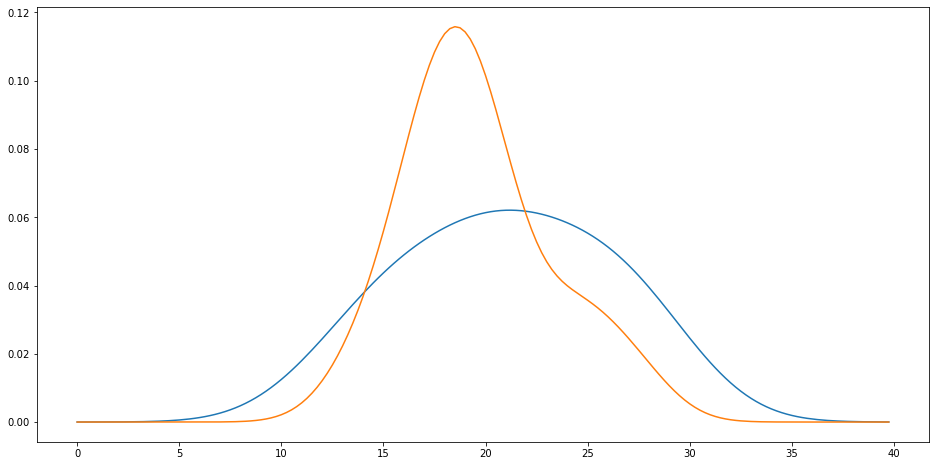

In [25]:
plt.figure(figsize=(16,8))
plt.plot(x_values, x_densities_a)
plt.plot(x_values, x_densities_b)

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

In [26]:
# Write your code here 
print('Visually, a does differ significantly from dataset b in one part of the graph.')

Visually, a does differ significantly from dataset b in one part of the graph.


### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [28]:
# Write your code here 
all_data = np.concatenate([a,b])
means_difference = []

for _ in range(1000):
    np.random.shuffle(all_data)
    a_subset = all_data[:15]
    b_subset = all_data[15:]
    means_difference.append(np.mean(a_subset) - np.mean(b_subset))

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

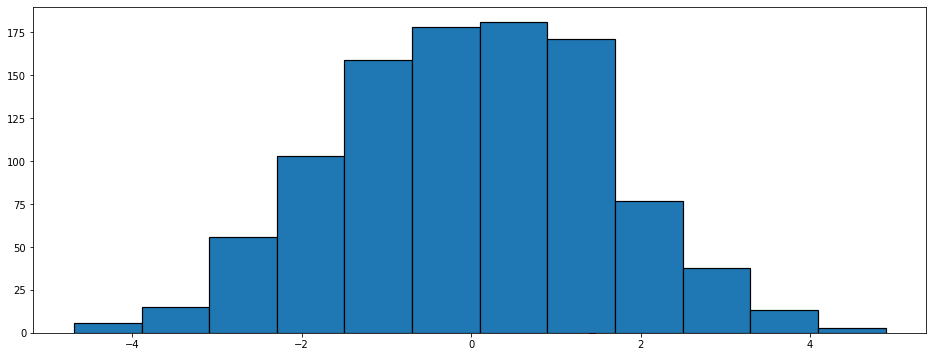

In [29]:
# Write your code here 
plt.figure(figsize=(16,6))

_ = plt.hist(means_difference, edgecolor='k', linewidth=1.2, bins=12)
plt.scatter(np.mean(a) - np.mean(b), 0, color = "red", s=40)